In [1]:
import numpy as np
import cv2
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
'''출처 : https://github.com/inyl/my_notebook/blob/master/open_cv/image_color_cluster.ipynb'''

'출처 : https://github.com/inyl/my_notebook/blob/master/open_cv/image_color_cluster.ipynb'

In [3]:
def centroid_histogram(clt):
    '''
    # grab the number of different clusters and create a histogram
    히스토그램 형식으로 색을 반환
    based on the number of pixels assigned to each cluster
    각 클러스터의 픽셀의 숫자를 기반으로 함
    '''
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()  # hist = hist/hist.sum()

    # return the histogram
    return hist

In [4]:
def plot_colors(hist, centroids):
    '''
    initialize the bar chart representing the relative frequency of each of the colors
    각 색의 빈도를 나타내는 바 차트를 초기화
    '''
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

In [5]:
def image_color_cluster(image_path, k = 5):
    image = cv2.imread(image_path)
    # image의 shape을 찍어보면, height, width, channel 순으로 나옴
    # channel은 RGB를 말함
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # cv에서는 RGB가 아닌 BGR 순으로 나오기 때문에 순서를 RGB로 전환
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    # shape의 0,1번째 즉, height와 width를 통합시킴
    
    clt = KMeans(n_clusters = k)  # 평균 알고리즘 KMeans
    clt.fit(image)

    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)
    
    plt.figure()
    plt.axis("off")
    plt.imshow(bar)
    plt.show()

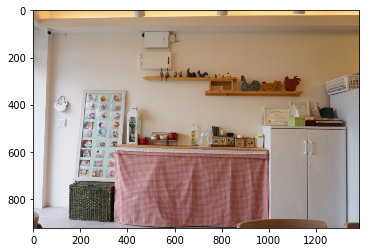

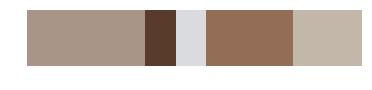

In [10]:
image_path = "./cafe_image/ss_dj_01.png"

#preview image
image = mpimg.imread(image_path)
plt.imshow(image)

image_color_cluster(image_path)

In [ ]:
img